# Project 3 - Crossmatching astronomical catalogues

**Project deadline:** This project is due for submission on Wednesday, 01.07.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you *four* projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

Astronomical observations in optical wavelengths are performed nowadys with CCD-cameras mounted on optical telescopes. The following figure shows two observations of the same patch of the sky. The data were taken in 2007 at our old observatory [Hoher List](https://www.hoher-list.de/).

<img src="figs/dithered_images.png" width="700" height="700" />

The objects in black are stars. These sources can be extracted from the images and analysed for their appearance, their brightness and many other quantities. Please see the Notebook `scipy_optical_object_detection.ipynb` within the github-repository [Thomas Erben - Python Cheat Sheets](https://github.com/terben/Python-cheat-sheets) if you are interested how such analyses can be performed with Python. We already covered all necessary topics in our course!

You note that the two images show approximately the same patch of the sky but also that they are shifted with respect to each other. You can spot three prominent sources in the upper part of the left figure which are located closer to the center on the right.

Although we know *in principle* precisely what the shift between different astronomical exposures is (we ask the telescope to point to a certain position of the sky), this information is subject to errors and inaccuracies - mostly due to pointing problems of the telescope.

To compare properties of the same source in different exposures - for instance to investigate whether a star is variable, it is essential to determine *precise* shifts between such exposures. To implement an algorithm for this task is the topic of this project.

## Our Algorithm to crossmatch astronomical catalogs

Starting point for our project are the six object catalogs `image013269.asc .. image013274.asc` from consecutive observations of the same patch of the sky within the `data` subdirectory. The catalogs are text files having two columns: The $x$ and $y$ positions of detected sources in their respective CCD-images.

In [1]:
!head data/image013269.asc

44.5027 28.2661
191.230 215.587
150.108 259.954
204.017 290.501
608.995 296.005
561.983 322.495
731.254 373.325
436.115 361.365
87.2245 409.041
699.004 416.995


The following image shows detected sources in the images `image013269.asc` and `image013271.asc`.

<img src="figs/detected_objects.png" width="700" height="700" />

Can you spot that those catalogues originate from the same sky-area but are shifted against each other? 
Given those source lists, we want to implement an algorithm to automatically determine offsets between the exposures in $x-$ and $y$-directions.

**Notes:**
1. You might realise that an $x-$ and $y-$shift cannot be the whole story because astronomical observations are done on *a sphere* and not on a two-dimensional plane. This is correct and for large-format cameras, we need to take into account spherical geometry. However, in our case, the field-of-view is so small that we can neglect the effects of a sphere and the plane approximation is good enough.

2. We realise that objects present in one image might not be present in the other one. This can have several reasons: (1) edge effects; (2) a CCD might have bad pixels within an object; (3) some detections are CCD artefacts and not of astronomical origin.

A possible algorithm to estimate a linear shift between two-dimensional point clouds
that share the same pattern (object configuration) is the following:

1. We calculate the $x$- and $y$-distances from all objects in one catalogue
   with respect to *all objects* in the other catalogue:
   
   An example with two fake catalogues:
   - Catalogue 1 has objects at (1, 1), (3, 1), (3, 3), (1, 3), (2, 2), (7, 2), (-1, 2)
   - Catalogue 2 has objects at (4, 4), (6, 4), (6, 6), (4, 6), (5, 5), (1, 3), 10, 6)
   
    The common pattern in the catalogues is a $2\times 2$ square
    with a point in the middle and each catalogue contains two
    points not present in the counterpart.
    
    If we calculate the x distances for point 1 of catalogue 1
    with all objects from catalogue 2 we obtain the array:

    1 - 4, 1 - 6, 1 - 6, 1 - 4, 1 - 5, 1 - 1, 1 - 10
   
    We obtain for point 2:

    3 - 4, 3 - 6, 3 - 6, 3 - 4, 3 - 5, 3 - 1, 3 - 10
    
    The same we do for *all other* points and also for the
    $y$-distances. We store those $x-$ and $y-$distances in two arrays.
    
2.  We analyse the frequency of the distances in histograms.
    We realise that the offsets between the
    catalogues can be found in the histogram bins (for $x$ and $y$
    separately) that contain most counts.   

## Task 1

Please do all the tasks at the end of this notebook. You will finally hand-in the modified notebook to your tutor.

To test your understanding of the algorithm, please answer the following questions:

1. What are good and what are bad object patterns for this algorithm
   to work well. Why do you think that the algorithm is especially suited for astronomical data?
   
   **Hint:**
   Assume that your main pattern is a straight line of equidistant points. What problem    does occur in this case?
   
2.  I wrote above 'The offset between the catalogues can be found
    at the histogram bins (for $x-$ and $y-$ separately) that contain
    most counts.'. Why do we need a histogram analysis? Can't we just
    get all the distances as in point 1 of the algorithm and check which value (distance) occurs most often in the arrays?

3. Assume that we can estimate object positions with an accuracy of up to one CCD pixel. Which histogram bin size would you choose for your analysis and why?

## Task 2

Write a Python program to implement the algorithm above and to estimate the $x-$ and $y-$offsets between the object patterns in catalogues [data/image013269.asc](data/image013269.asc) and [data/image013271.asc](data/image013271.asc). Your program should plot the two histograms of the $x-$ and $y-$ distances and print the estimated offsets.

**Hints:**
1. First, read the data and store the $x-$ and $y-$ coordinates from each image in one-dimensional arrays. To obtain from those the arrays of all distances between the two catalogues is a *one-line* broadcast operation for each of the $x-$ and $y-$coordinates. You should have no difficulties with it if you understood the *Route 66*-problem from the lecture 06 review questions. If you have the distances written in a two-dimensional matrix, you can convert it to a one-dimensional array with the `np.flatten` command.

2. To analyse the histograms for the maximum-count bins and to estimate the distances, see the last task from the lecture 06 review questions. Up to what accuracy can you determine the shifts with this method?

3. For this and later tasks, I found the function `enumerate` very useful to write more compact programs. Just have a look at the documentation but do not feel obliged to use it.

## Task 3

We have six catalogues and we want to estimate shifts between *all* of them. Having the algorithm for pairwise shifts (Task 2), one could estimate shifts between three catalogues `c_1.asc`, `c_2.asc` and `c_3.asc` in the following two ways:
1. Obtain with Task 2 the distances between `c_1.asc` and `c_3.asc`. This be $d_{13}$. Similarily, the distance between `c_1.asc` and `c_2.asc` with Task 2 be $d_{12}$. Then the distance between `c_2.asc` and `c_3.asc` must be $d_{23} = d_{21} - d_{31}$.
2. Perform the same steps as in (1.) but estimate $d_{23}$ with Task 2 as well.

Perform this analysis for several combinations of the catalogues `image013269.asc .. image013274.asc`. What do you observe? If you obtain different results for $d_{23}$ with both methods, why is this the case?

## Task 4

Task 3 should show you that a pure pairwise analysis to obtain consistent offset values between more than two catalogues is not optimal. In this task, we want to estimate the shifts taking into account all available data points simultaneously.

We want to proceed as follows:

Using the algorithm of Task 2, we obtain estimates $d_{ij}$ for *all* pairs of distances between all involved catalogues. We write the $d_{ij}$ as follows:

$$
\begin{eqnarray}
  d_{12} & = d_{1} - d_{2} + e_{12}\\
  d_{13} & = d_{1} - d_{3} + e_{13}\\
  d_{14} & = d_{1} - d_{4} + e_{14}\\
  \vdots \\
  d_{23} & = d_{2} - d_{3} + e_{23}\\
  d_{24} & = d_{2} - d_{4} + e_{24}\\
  \vdots \\
  \label{eq:lsq} \tag{1}
\end{eqnarray}
$$

The $d_{i}$ are shifts that we would apply to image $i$ (separately for $x$ and $y$) and the $e_{ij}$ are (unknown) errors of the $d_{ij}s$.
The goal is to obtain $d_{i}s$ that satisfy *all* equations of (1) simultanesously *as good as possible*. 

### Subtask 4.1
Please make clear to yourself that estimating the $d_{i}s$ can be formulated as a classical *Linear Least Squares Problem*; see also the next subtask. You already solved many of those in your Lab experiments or/and you learned about it in your math courses. You have measurements $d_{ij}$ with (not exactly known) errors and many equations for the unknowns $d_{i}$.

To show you better that you already know this sort of problem: A classical physics experiment is to estimate velocoty and starting point of a car undergoing a uniform motion, i.e. to estimate parameters of the relation $s=v\cdot t + s_0$. You typically have many mesurements of $t$ and $s$ (with errors) and you estimate $v$ and $s_0$ with a *fit* (a Linear Least-Squares problem!). Our task at hand is very similar!

Please discuss, why the system (1) above cannot be solved uniquely in the *Least-Squares sense*. To be able to do so, you need to add another equation to the system. There are many possibilities to do so. Just write down why you make a certain choice.

If you have difficulties with this task at this stage, come back to it after the next subtask.

### Subtask 4.2
For clarity, we discuss the general case of the equation system $(1)$ above in the special case of three catalogues. In that case, the three equations:
$$
\begin{eqnarray*}
  d_{12} & = d_{1} - d_{2} + e_{12}\\
  d_{13} & = d_{1} - d_{3} + e_{13}\\
  d_{23} & = d_{2} - d_{3} + e_{23}\\
  \label{eq:three_cat} \tag{2}
\end{eqnarray*}
$$
can be written in matrix form $Ax - b = e$ with:
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{3}
$$

The Least-Squares technique (or a data-fit) now chooses the $x$ (or the $d_{i}s$) which minimise the Euclidean norm of $e$:
$$
\text{min}\; ||e||_{2}^{2} = \text{min}\; ||Ax - b||_{2}^{2},
$$
where $||\cdot ||$ is the euclidean norm.

The solution to this problem is given by the *normal equations*:
$$
(A^T A) x = A^T b.
\label{eq:normal_eq} \tag{4}
$$

This is a system of *normal linear equations* which you know very well from Linear Algebra. 
Write down the matrix $A^T A$ for the case of eq. (2) and show that it is a singular matrix. This is the mathematical reason for the argument that you provided in subtask 4.1. Add your choice of an additional equation to the system of (2) and show that (4) now will give a unique solution to the problem.

### Subtask 4.3

Implement the algorithm of subtask 4.2 to solve the offset problem for the six catalogues `image013269.asc .. image013274.asc`. Start your code with a list containing the locations of the involved catalogues. Your program needs to handle the genral case when an arbitrary amount of catalogues ($\geq 2$) is put into that list, i.e. your program should not work only for the special case of six catalogues. Finally, plot in a scatter plot the offset pattern for the six observations.

**Hints:** (1) Note that you have to solve a system of equations (2) for each of the $x-$ and $y-$coordinates; (2) How many equations do you need if you have $n$ catalogues?; (3) You can use loops to obtain the $d_{ij}s$ and to build up matrix $A$ and vector $b$; (4) You do not need to plot all the histograms - you should do so in the beginning to test your program though. Have a look at the `numpy.histogram` function. It is equivalent to `plt.histogram` but it does not plot the histogram. (5) Have a look at the `numpy.linalg.lstsq` function. You can directly feed into that function the matrx $A$ and vector $b$ from eq. (3). There is no need for you to explicitely build and solve the normal equations from eq. (4).

In [1]:
# I import all the necessary modules.

%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import glob

## Solution of Task 1

### Solution to task 1 question 1
#### In case of astronomical data given, we actually don't need to know which star is which, as long as it is guaranteed that the given 10 stars in the one catalog always exists in the second catalog. Once it is done so, all we need to do is take the diffrence between combinations of them and  calculate the distance. Then we plot the histogram. The histogram will tell us about the shift that occurs. And the shift won't care about distinguishability of the stars since we are working in pixel frame of reference. And hence the algorithm should work regardless of whether the objects are equidistant on a straight line or not.

### Solution to Task 1 question 2
#### A histogram represents a frequency distribution by means of rectangles whose widths represent class intervals and whose areas are proportional to the corresponding frequencies: the height of each is the average frequency density for the interval.The benfit of histogram analysis is that empty intervals are represented as empty and not skipped. Moreover, the coordinates and hence the respective distances have uncertainty. So every pair of corresponding points in the two analysed catalogues will have similar but not same values for the distance. Hence we can't just select the value which occurs thes most in the array. We will be needing binning. Here,  the offsets between the catalogues can be found in the histogram bins (for  𝑥  and  𝑦  separately) that contain most counts.

### Solution to Task 1 question 3
#### In general, there is no "best" number of bins, and different bin sizes can reveal different features of the data. Using wider bins where the density of the underlying data points is low reduces noise due to sampling randomness; using narrower bins where the density is high (so the signal drowns the noise) gives greater precision to the density estimation. 
#### Now we have to select the bins in such a way that the distance for an object, $d_i$ -$d_j$ falls in the same bin for x and y coordinate respectively. This is justified in task 2 solution.

## Solution of Task 2

Estimated x offset is : 27.712530000000072


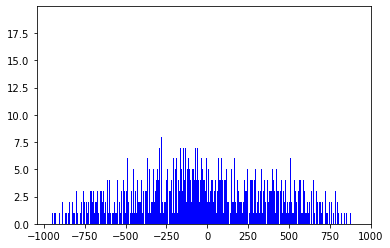

In [3]:
#data_69= !head data/image013269.asc # I read the data from image013269.asc
#data_71= !head data/image013271.asc # I read the data from image013271.asc

'''
However, here head  is used to get the first 10 rows containing x and y values
#hence I will use glob module to extract all the rows of data from each image file
'''


a = np.loadtxt('data/image013269.asc') # I use np.loadtxt to load data from the text file image013269.asc and  image013271.asc
b = np.loadtxt('data/image013271.asc')

#x = np.append(a[:,0],b[:,0]) # I use slicing to read only the 1st column of both the data sets a and b which give us information about the x coordinate of the objects and then I use append to combine both into a single array
x_69=a[:,0]#1st column (x) of catalogue containing image013269
x_71=b[:,0]#1st column (x) of catalogue containing image013271

diff_x = x_69 - x_71[:,np.newaxis]# I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided
diff_x_1D = (diff_x.flatten())# the x distances in a 2D matrix, can be converted into a 1D array with the flatten command. 

bins_x = int((np.max(diff_x_1D)-np.min(diff_x_1D))/4) # Then I define bin  I take the bin width to be 4. The reason is mentioned in solution of TASK1
values_x, bins_x, _ = plt.hist(diff_x_1D,bins_x,color='blue')# I use plt.hist to compute and draw the histogram of x_sort values


max_ind = np.argmax(values_x)# I use np.argmax to find the argument that gives the maximum value in the array values_x 
s_x = values_x[max_ind]# this gives maximum counts bin
o_x = 0.5 * (bins_x[max_ind] + bins_x[max_ind + 1]) # This will give value of x offset
print("Estimated x offset is :",o_x)



Estimated y offset is : 576.1186035600424


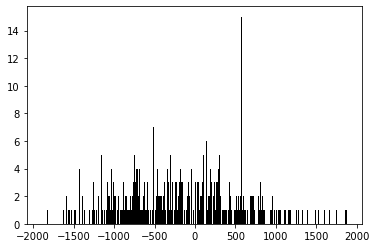

In [255]:
#y = np.append(a[:,1],b[:,1]) # I use slicing to read only the 1st column of both the data sets a and b which give us information about the y coordinate of the objects and then I use append to combine both into a single array
y_69=a[:,1]
y_71=b[:,1]
#print(x,y)
diff_y = y_69 - y_71[:,np.newaxis]# I use np.newaxis to make y, a column vector by inserting an axis along second dimension and then i subtract it from y to get the task mentioned in the step 1 of the alogorithm provided
#

diff_y_1D = (diff_y.flatten()) #the y distances in a 2D matrix, can be converted into a 1D array with the flatten command.

bins_y = int((np.max(diff_y_1D)-np.min(diff_y_1D))/4)

values_y, bins_y, _ = plt.hist(diff_y_1D,bins_y,color='black') # I use plt.hist to compute and draw the histogram of y values

#print(len(values_y))

max_ind = np.argmax(values_y)# I use np.argmax to find the argument that gives the maximum value in the array values_y 
s_y = values_y[max_ind] # this gives maximum counts bin
o_y = 0.5 * (bins_y[max_ind] + bins_y[max_ind + 1])# This will give value of y offset 
print("Estimated y offset is :",o_y)


## Solution to Task 3

In [91]:
# load all the data in following

c_1=np.loadtxt('data/image013269.asc')
c_2=np.loadtxt('data/image013270.asc')
c_3=np.loadtxt('data/image013271.asc')
c_4=np.loadtxt('data/image013272.asc')
c_5=np.loadtxt('data/image013273.asc')
c_6=np.loadtxt('data/image013274.asc')

#### Here, at first I use the same algorithm as in Task 2 to calculate the respective shifts between three catalogues c_1, c_2, and c_3 as defined above

#### At first I calculate the shift between the catalogues c_2 and c_1 to obtain $d_{21}$

In [264]:
a1=c_2[:,0]# 1st column(x) of catalogue 2
b1=c_1[:,0]# 1st column(x) of catalogue 1
a2=c_2[:,1]# 2nd column(y) of catalogue 2
b2=c_1[:,1]# 2nd column(y) of catalogue 1
 
d21_x1 = a1 - b1[:,np.newaxis] # I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided
d21_y1 = a2 - b2[:,np.newaxis]
k1_x =d21_x1.flatten()
k1_y =d21_y1.flatten()


#### Then I calculate the shift between the catalogues c_3 and c_1 to obtain $d_{31}$

In [265]:
a3=c_3[:,0]# 1st column of catalogue 3 
b3=c_1[:,0]# 1st column (x) of catalogue 1
a3_y=c_3[:,1]# 2nd column (y) of catalogue 3
b3_y=c_1[:,1]# 2nd column (y) of catalogue 1
 
d31_x1 = a3 - b3[:,np.newaxis] # I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided
d31_y1 = a3_y - b3_y[:,np.newaxis]
k2_x=d31_x1.flatten()
k2_y=d31_y1.flatten()


#### Now, $d_{23}$ can be obtained in 2 ways, first by pairwise selection which is just $d_{23}=d_{21}-d_{31}$ and secondly just by following the algorithm from Task 2.

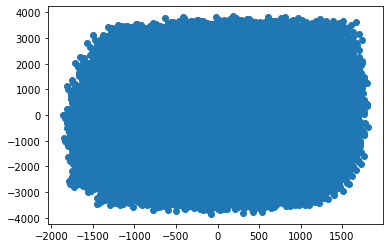

In [266]:
#d_23 obtained by pairwise selection
d23_pairwise_x = np.subtract(k1_x, k2_x[:,np.newaxis])# d23_pairwise = d_21-d_31
d23_pairwise_y = np.subtract(k1_y, k2_y[:,np.newaxis])

#print(d23_pairwise)


#d_23 obtained by the algorithm
a2=c_2[:,0]#1st column (x) of catalogue 2
b2=c_3[:,0]#1st column (x) of catalogue 3
a2_y=c_2[:,1]# 2nd column (y) of catalogue 2
b2_y=c_3[:,1]# 2nd column (y) of catalogue 3
#x1 = np.append(c_2[:,0],c_3[:,0]) 
d23_x1 = a2 - b2[:,np.newaxis] # I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided
d23_y1 = a2_y - b2_y[:,np.newaxis]
k3_x =d23_x1.flatten()
k3_y =d23_y1.flatten()
#print(d23__x_1D)


plt.scatter(d23_pairwise_x, d23_pairwise_y)

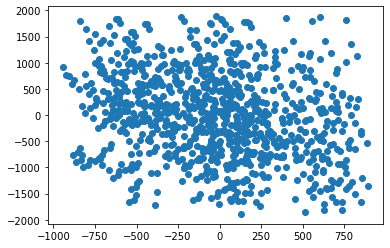

In [267]:

plt.scatter(k3_x, k3_y)


#### From above we see that $d_{23}$ obtained from pairwise selection is not same as that obtained by using the algorithm mentioned in Task 2. This is because the values obtained from pure pairwise analysis doesn't give us consistent offset values for more than two catalogues and hence it is not optimal. 

## Solution to subtask 4.1

#### Because b is not in the column sapace of A. Moreover, There are errors not only in $d_{ij}s$ but also in $d_{i}$s and $d_{j}$s respectively. So When we do pairwise analysis of, say, $d_{23}=d_{21}-d_{31}$,  there is an addition of additional error from each of $d_{21}$ and $d_{31}$ respectively in the calculation of$d_{23}$.

## Solution to subtask 4.2

#### So here we have to solve the set of linear equations to obtain the elements of matrix x. Now one of the possible ways of solving it is by using the equation: x=$(AA^{T})^{-1}A^{T}b$. But there arises the problem that A is a singular matrix in our case and hence we cannot have $A^{-1}$ matrix. So in order to make A non-singular, I set up a new equation $d_1$=0. Accordingly our 3$\times$3 matrix gets converted into 4$\times$3 matrix which is non-singular and thus we can have the inverse of this modified A matrix.

#### Now , I first print below the x-offsets of $d_{13}$, $d_{12}$ and $d_{23}$ respectively. [I denote the offsets below as $s_{ij}$]

In [275]:
#x1 = np.append(c_1[:,0],c_3[:,0]) 
m1=c_1[:,0]#1st column (x) of catalogue 1
n1=c_3[:,0]##1st column (x) of catalogue 3
d13_x1 = m1 - n1[:,np.newaxis] # I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided

d13__x_1D =d13_x1.flatten()
bins_x = int((d13__x_1D.max()-d13__x_1D.min())/4)
values_x, bins_x= np.histogram(d13__x_1D,bins_x)

max_ind = np.argmax(values_x)
d_13 = d13__x_1D[max_ind]
t_13 = values_x[max_ind]
s_13 = 0.5 * (bins_x[max_ind] + bins_x[max_ind + 1])
print(s_13)

27.712530000000072


In [278]:
 
m1=c_1[:,0]#1st column (x) of catalogue 1
n1=c_2[:,0]#1st column (x) of catalogue 2

d12_x = m1 - n1[:,np.newaxis] # I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided

d12__x_1D =d12_x.flatten()
bins_x = int((d12__x_1D.max()-d12__x_1D.min())//4)
values_x, bins_x= np.histogram(d12__x_1D,bins_x)

max_ind = np.argmax(values_x)
d_12 = d12__x_1D[max_ind]
t_12 = values_x[max_ind]
s_12 = 0.5 * (bins_x[max_ind] + bins_x[max_ind + 1])
print(s_12)

22.168223000000125


In [279]:
x3 = np.append(c_2[:,0],c_3[:,0]) 

m1=c_2[:,0]#1st column (x) of catalogue 2
n1=c_3[:,0]#1st column (x) of catalogue 3

d23_x = m1 - n1[:,np.newaxis]# I use np.newaxis to make x, a column vector by inserting an axis along second dimension and then i subtract it from x to get the task mentioned in the step 1 of the alogorithm provided

d23__x_1D =d23_x.flatten()
bins_x = int((d23__x_1D.max()-d23__x_1D.min())//4)
values_x, bins_x= np.histogram(d23__x_1D,bins_x)

max_ind = np.argmax(values_x)
d_23 = d23__x_1D[max_ind]
t_23 = values_x[max_ind]
s_23 = 0.5 * (bins_x[max_ind] + bins_x[max_ind + 1])
print(s_23)

5.538756986899557


In [286]:
A=np.column_stack(([1,1,0],[-1,0,1], [0,-1,-1]))# The A matrix obtained from equation 2
At=A.T #At is the transpose of A matrix
A_s=np.dot(A,At) # product of A and A transpose
print(np.linalg.det(A_s)) # determinant of A_s

0.0


#### SInce the determinant of ($AA^T$) is zero. SO we can say that ($AA^T$) is singular. Now we need to convert $(AA^T)$ into a non-singular matrix so that we get an inverse

In [281]:
A_modified=np.column_stack(([0,0,0,1],[-1,0,1,0], [0,-1,-1,0]))
print(A_modified)

b_modified=np.array([s_12,s_13,s_23,0])

At= np.linalg.inv(np.dot(A_modified.T, A_modified))
bt=np.dot(A_modified.T,b_modified)

x_mod=np.dot(At,bt)

#s=np.linalg.det(A_modified)
print(x_mod)
# the x_mod matrix consistes of the values of d_2 and d_3. d_1 we considered to be 0. 

[[ 0 -1  0]
 [ 0  0 -1]
 [ 0  1 -1]
 [ 1  0  0]]
[  0.       -22.170073 -27.71068 ]


#### We get unique values of x matrix using eqn.(4)

## Solution to subtaks 4.3

#### In general for n catalogues we will have $\frac{n(n-1)}{2}$ equations. In our case we have 6 catalogues and hence 15 equations in total.


In [4]:
data = glob.glob('/home/jovyan/Project_3/data/*.asc') # I use the glob module to read all the data on the 6 catalogues together
#data= !head data/*.asc
#print(len(d))
k = 0
n=len(data)
A = np.zeros((int(n*(n-1)/2),n), dtype = 'int')
b = []
b_y=[]

'''
Start of the loop for general case where we have n catalogues with the condition that there should be >=2 cataloguesr.
'''
if len(data) >= 2:
    for i in range(len(data)): # here i defines the indices from 1 to 6
        #print(i)
        c1 = np.loadtxt(data[i])
        #print(c1)
        for j in range(i+1,len(data)):# here we form the loop such that for a particular value of i, j will take the value i+1
            
            c2 = np.loadtxt(data[j])
            r1=c1[:,0]
            r2=c2[:,0]
            r1_y=c1[:,1]
            r2_y=c2[:,1]
            
            diff =  (r1- r2[:,np.newaxis])
            diff_y =  (r1_y- r2_y[:,np.newaxis])
            diff_flatten_y = diff_y.flatten()
            diff_flatten = diff.flatten()
            bins_x = int((np.max(diff_flatten)-np.min(diff_flatten))/4)
            bins_y = int((np.max(diff_flatten_y)-np.min(diff_flatten_y))/4)
            values_x, bins_x = np.histogram(diff_flatten,bins_x)
            values_y, bins_y = np.histogram(diff_flatten_y,bins_y)
            max_ind = np.argmax(values_x)
            max_ind_y = np.argmax(values_y)
            maxval = values_x[max_ind]
            maxval_y = values_y[max_ind_y]
            s_x = 0.5 * (bins_x[max_ind] + bins_x[max_ind + 1])# offsets in x
            s_y = 0.5 * (bins_y[max_ind_y] + bins_y[max_ind_y + 1])# offsets in y
            b = np.append(b,s_x)
            b_y = np.append(b_y,s_y)
            
            A[k,i] = 1 # this will give the coefficients of d_i for each equation
            A[k,j] = -1 ## this will give the coefficients of d_j for each equation
            A[:,0]=0 # We add another equation of d_1=0 which I will modify in next cell
            k +=1 # set up counter to prevent repition 
print(A)
#print(b)

[[ 0 -1  0  0  0  0]
 [ 0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0]
 [ 0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1]
 [ 0  1 -1  0  0  0]
 [ 0  1  0 -1  0  0]
 [ 0  1  0  0 -1  0]
 [ 0  1  0  0  0 -1]
 [ 0  0  1 -1  0  0]
 [ 0  0  1  0 -1  0]
 [ 0  0  1  0  0 -1]
 [ 0  0  0  1 -1  0]
 [ 0  0  0  1  0 -1]
 [ 0  0  0  0  1 -1]]


#### Now we have th loop. Here again I put up $d_1$ to be zero so we can remove the 1st column from the A matrix which will give us the modified A matrix

In [292]:
#print(A)
b1=(b.flatten()).tolist()
b2=(b_y.flatten()).tolist()
b1.append(0)
b2.append(0)
#print(b1)

A_m=np.append(A,[1,0,0,0,0,0]).reshape(16,6)
A_m=np.array(A_m)
#print(A_m)

#A_m = A[:,1:]# the 1st colum of A omitted because d_1=0
x=np.linalg.lstsq(A_m,b1, rcond=None)[0]
x1=np.linalg.lstsq(A_m,b2, rcond=None)[0]
print(x)
print(x1)


[  0.         -22.17078175 -27.71366982  26.55724848  22.95772315
 -40.47809855]
[   0.         -508.54319985 -575.60096409 -576.246233   -625.04212576
 -624.68010856]


#### The arrays x and x1 above contains the values from $d_1$ to $d_6$ for x and y values respectively

#### The values obtained above are consistent with the ones obtained in the tasks above


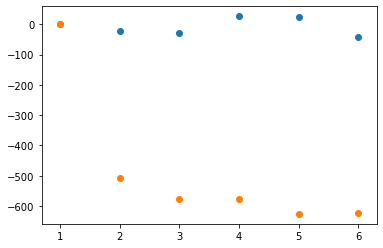

In [293]:
a=np.arange(1,7)# this is just an array to indicate the catalogue number
plt.scatter(a, x)
plt.scatter(a, x1)


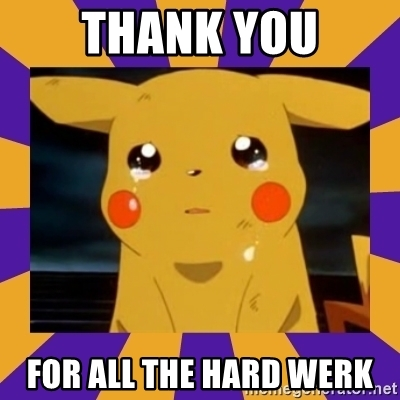

In [297]:
from IPython.display import Image
Image(filename='pika.jpg',width=400, height=200)